Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499.
(https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)

In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
print("학습 feature 갯수:", len(diabetes.data))
print("학습 label 갯수:", len(diabetes.target))

학습 feature 갯수: 442
학습 label 갯수: 442


In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
diabetes.data_module

'sklearn.datasets.data'

In [6]:
X = diabetes.data
y = diabetes.target
X.shape, y.shape

((442, 10), (442,))

In [123]:
class MultiLinear:
  def __init__(self,learning_rate=0.001):
    self.w=None #모델의 weight 벡터 self.w=(w_1,w_2)
    self.b=None #모델의 bias
    self.lr=learning_rate #모델의 학습률
    self.losses=[] #매 에포크마다 손실을 저장하기 위한 리스트
    self.weight_history=[] #매 에포크마다 계산된 weight를 저장하기 위한 리스트
    self.bias_history=[] #매 에포크마다 계산된 bias를 저장하기 위한 리스트
    self.pred = []
    
  def forward(self,x):
    y_pred=np.sum(x*self.w)+self.b #np.sum함수는 인자로 받은 numpy배열의 모든 원소의 합을 return합니다.
    return y_pred

  def loss(self,x,y):
    y_pred=self.forward(x)
    self.pred.append(y_pred)
    return (y_pred-y)**2

  def gradient(self,x,y):
    y_pred=self.forward(x)
    w_grad=2*x*(y_pred-y)
    b_grad=2*(y_pred-y)

    return w_grad,b_grad

  def fit(self,x_data,y_data,epochs=20):
    self.w=np.ones(x_data.shape[1]) #모델의 weight들을 전부 1로 초기화
    self.b=0 #모델의 bias를 0으로 초기화
    for epoch in range(epochs):
      l=0 #계산할 손실값
      w_grad=np.zeros(x_data.shape[1]) #weight의 기울기를 누적할 numpy배열
      b_grad=0  #bias의 기울기를 누적할 변수

      for x,y in zip(x_data,y_data):
        l+=self.loss(x,y)
        w_i,b_i=self.gradient(x,y)

        w_grad+=w_i #weight누적
        b_grad+=b_i #bias누적

      self.w-=self.lr*(w_grad/len(y_data)) #weight 업데이트
      self.b-=self.lr*(b_grad/len(y_data)) #bias 업데이트
 
      print(f'epoch ({epoch+1}) ===> loss : {l/len(y_data):.5f}')
      self.losses.append(l/len(y_data)) #손실값 저장
      self.weight_history.append(self.w) #weight 배열 저장
      self.bias_history.append(self.b) #bias값 저장

In [8]:
import numpy as np
import pandas as pd

model = MultiLinear(learning_rate=0.1)
model.fit(X,y,epochs=40)

epoch (1) ===> loss : 29055.28756
epoch (2) ===> loss : 20715.48312
epoch (3) ===> loss : 15375.24358
epoch (4) ===> loss : 11954.73452
epoch (5) ===> loss : 9762.86190
epoch (6) ===> loss : 8357.32549
epoch (7) ===> loss : 7455.05312
epoch (8) ===> loss : 6874.87857
epoch (9) ===> loss : 6500.85541
epoch (10) ===> loss : 6258.77792
epoch (11) ===> loss : 6101.15439
epoch (12) ===> loss : 5997.59010
epoch (13) ===> loss : 5928.63241
epoch (14) ===> loss : 5881.83158
epoch (15) ===> loss : 5849.21975
epoch (16) ===> loss : 5825.69748
epoch (17) ===> loss : 5808.00108
epoch (18) ===> loss : 5794.04176
epoch (19) ===> loss : 5782.48266
epoch (20) ===> loss : 5772.46817
epoch (21) ===> loss : 5763.45067
epoch (22) ===> loss : 5755.07965
epoch (23) ===> loss : 5747.13074
epoch (24) ===> loss : 5739.46035
epoch (25) ===> loss : 5731.97651
epoch (26) ===> loss : 5724.62036
epoch (27) ===> loss : 5717.35418
epoch (28) ===> loss : 5710.15383
epoch (29) ===> loss : 5703.00380
epoch (30) ===> los

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#scikit-learn에서 제공하는 선형 회귀 모델
skmodel = LinearRegression()

#model을 x와 y 데이터셋을 이용하여 학습시킴
skmodel.fit(X,y)

pred = skmodel.predict(X)  # 확률을 반환하는 경우

mae = mean_absolute_error(y, pred)
print(f"Mean Absolute Error: {mae}") #결과값이 최악이네요

Mean Absolute Error: 43.277395083749866


### 데이터 개선 작업 시작
1. 데이터 확인 
2. 데이터 시각화
3. 데이터 별 연관성 확인
4. 적정 모델 선택
5. 모델 학습 
6. 모델 평가 
7. 결과

In [134]:
# 1. 데이터 확인 
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
print("데이터 타입 :", type(diabetes))
print("데이터 Keys :", diabetes.keys())
print("데이터 파일 이름 :", diabetes.data_filename, diabetes.target_filename)
print("데이터 모듈 :", diabetes.data_module)
print("데이터 feature 형태 :", diabetes.data.shape)
print("데이터 label 형태 :", diabetes.target.shape)

데이터 타입 : <class 'sklearn.utils.Bunch'>
데이터 Keys : dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
데이터 파일 이름 : diabetes_data.csv.gz diabetes_target.csv.gz
데이터 모듈 : sklearn.datasets.data
데이터 feature 형태 : (442, 10)
데이터 label 형태 : (442,)


In [135]:
# 데이터 프레임으로 변경
import pandas as pd

X = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
y = pd.DataFrame(diabetes.target)
print(y)
X.head()

         0
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
..     ...
437  178.0
438  104.0
439  132.0
440  220.0
441   57.0

[442 rows x 1 columns]


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [136]:
X.info() # Null 값 확인 및 데이터 타입 확인 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [137]:
y.info() # Null 값 확인 및 데이터 타입 확인 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       442 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


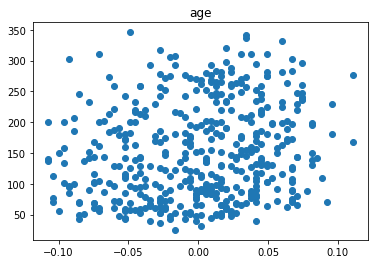

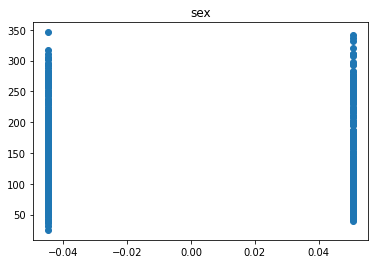

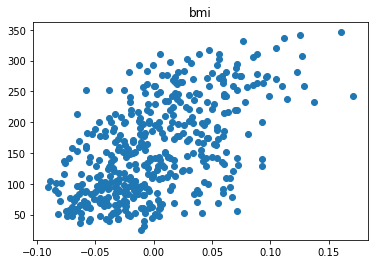

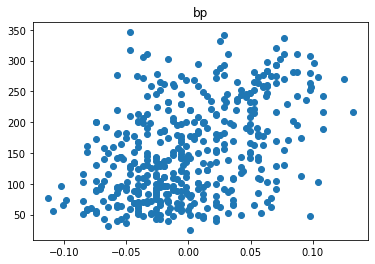

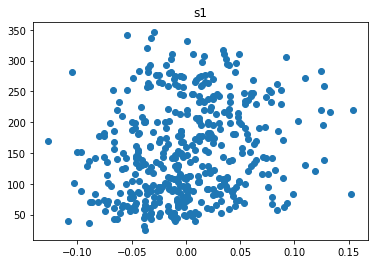

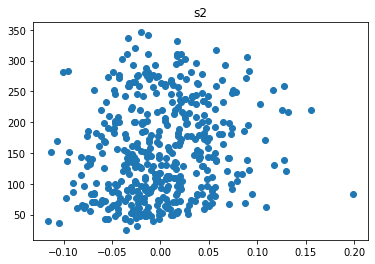

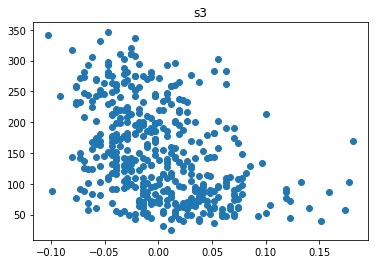

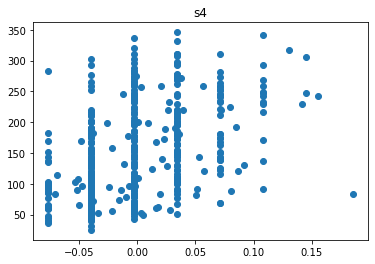

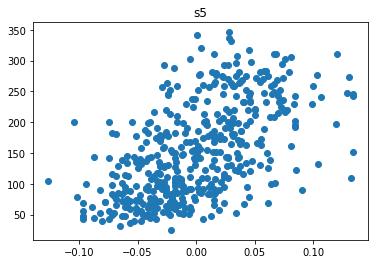

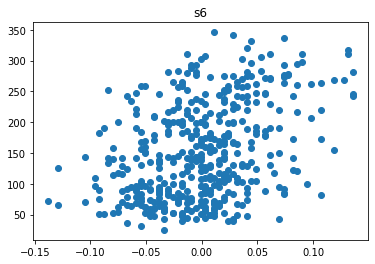

In [138]:
# 2. 데이터 시각화
import matplotlib.pyplot as plt

# 데이터를 확인한 결과 bmi, bp, s1s2s3s4s5s6에 연관이 많이 보인다.
for i in X.columns:
    plt.scatter(X[i], y)
    plt.title(i)
    plt.show()

<AxesSubplot:>

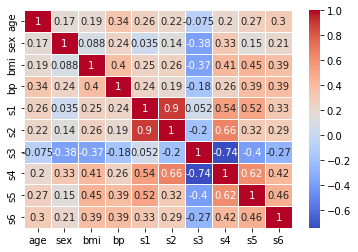

In [139]:
import seaborn as sns

# 상관관계 확인방법
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

# s1, s2 / s3, s4 / s4, s5 / 

In [140]:
# 데이터 분리하기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(353, 89, 353, 89)

In [141]:
# 모델 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

# 훈련 & 추론
model.fit(X_train, y_train)
pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, pred)
print("평균 제곱 오차 (MSE):", mse)

# 모델의 기울기와 절편 출력
print("기울기 :", model.coef_)
print("절편 :", model.intercept_)

평균 제곱 오차 (MSE): 2900.1732878832318
기울기 : [[  37.90031426 -241.96624835  542.42575342  347.70830529 -931.46126093
   518.04405547  163.40353476  275.31003837  736.18909839   48.67112488]]
절편 : [151.34565535]


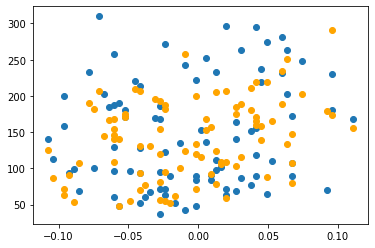

In [153]:
plt.scatter(X_test['age'], y_test)
plt.scatter(X_test['age'], pred, c='orange')
plt.show()

In [124]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.2, random_state=42)

# 기존 모델로 학습
model = MultiLinear(learning_rate=0.1)
model.fit(X_train,y_train,epochs=40)

print('\n최저 loss :', min(model.losses))

epoch (1) ===> loss : 29690.32988
epoch (2) ===> loss : 21172.89284
epoch (3) ===> loss : 15718.94566
epoch (4) ===> loss : 12225.62750
epoch (5) ===> loss : 9987.11220
epoch (6) ===> loss : 8551.67412
epoch (7) ===> loss : 7630.21079
epoch (8) ===> loss : 7037.69785
epoch (9) ===> loss : 6655.72052
epoch (10) ===> loss : 6408.49382
epoch (11) ===> loss : 6247.51565
epoch (12) ===> loss : 6141.74487
epoch (13) ===> loss : 6071.31525
epoch (14) ===> loss : 6023.51245
epoch (15) ===> loss : 5990.19933
epoch (16) ===> loss : 5966.16812
epoch (17) ===> loss : 5948.08584
epoch (18) ===> loss : 5933.81938
epoch (19) ===> loss : 5922.00352
epoch (20) ===> loss : 5911.76449
epoch (21) ===> loss : 5902.54306
epoch (22) ===> loss : 5893.98129
epoch (23) ===> loss : 5885.85009
epoch (24) ===> loss : 5878.00278
epoch (25) ===> loss : 5870.34549
epoch (26) ===> loss : 5862.81810
epoch (27) ===> loss : 5855.38210
epoch (28) ===> loss : 5848.01282
epoch (29) ===> loss : 5840.69445
epoch (30) ===> los